In [1]:
import pandas as pd

data = {
    "Tanggal" : ["2025-02-01", "2025-02-01", "2025-02-02", "2025-02-02", "2025-02-03"],
    "Produk" : ["Sabun Mandi", "Tepung Terigu", "Gula Pasir", "Garam Dapur", "Kopi Sachet"],
    "Jumlah Terjual" : [ 15, 10, 16, 10, 15],
    "Stok" : [20, 15, 20, 18, 25],
    "Harga Satuan" : [8000, 10000, 14000, 5000, 2500],
}

df = pd.DataFrame(data)

df.to_csv("data_penjualan.csv", index=False)

print("File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!")

File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!


In [ ]:
import pandas as pd

df = pd.read_csv("data_penjualan.csv")
df["Tanggal"] = pd.to_datetime(df["Tanggal"])


df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

print(df.head())

     Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-02-01    Sabun Mandi              15    20          8000   
1 2025-02-01  Tepung Terigu              10    15         10000   
2 2025-02-02     Gula Pasir              16    20         14000   
3 2025-02-02    Garam Dapur              10    18          5000   
4 2025-02-03    Kopi Sachet              15    25          2500   

   Total Penjualan  Keuntungan  
0           120000      -30000  
1           100000           0  
2           224000       64000  
3            50000      -50000  
4            37500     -112500  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df["Restock"] = df["Stok"] < 5
x = df[["Jumlah Terjual", "Stok"]]
y = df["Restock"].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi Model: {accuracy * 100:.2f}%")

Akurasi Model: 100.00%


In [ ]:
input_data = [[8,3]]

prediksi = model.predict(input_data)

status = "Perlu Restock" if prediksi[0] == 1 else "Perlu di Restock"

print(f"Prediksi: {status}")

Prediksi: Tidak Perlu Restock


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


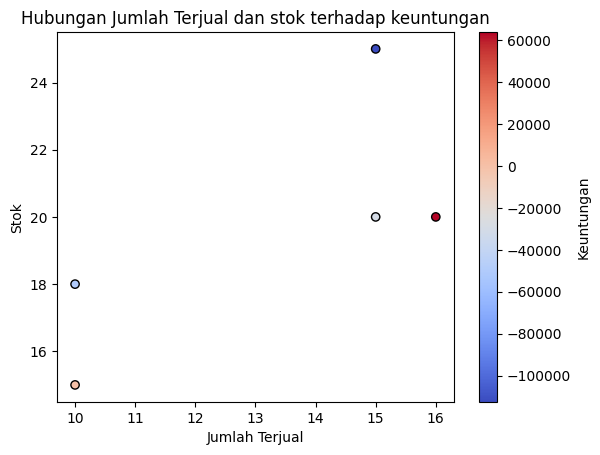

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm", edgecolors="k")
plt.colorbar(label="Keuntungan")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Hubungan Jumlah Terjual dan stok terhadap keuntungan")
plt.show()